# **Flixlytics (Netflix + Analytics) 🔍🍿**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
file_path = r"C:\Users\suhan\OneDrive\Desktop\netflix_titles.csv"
df = pd.read_csv(file_path)

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### **Inference**
- 8,807 rows, 12 columns
- Missing values → director, cast, country, date_added, rating, duration
- Data types → Mostly object, only release_year is int64

## **Data Cleaning**

In [31]:
# Copy of the original dataframe to keep things clean
df_clean = df.copy()

In [32]:
# Convert 'date_added' to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], format='mixed')

### **Inference**
By converting **date_added** in date and time formate,
-  Ensures data consistency by converting date_added to a standard datetime format.
- Allows easy date-based analysis (e.g., filtering by year or month).
- Handles mixed date formats automatically.

In [33]:
# Fill missing 'country' values with 'Unknown'
df_clean['country'].fillna('Unknown', inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


C:\Users\suhan\AppData\Local\Temp\ipykernel_109976\3393807055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['country'].fillna('Unknown', inplace=True)


### **Inference**
- Missing values in country filled with "Unknown"
- No missing values in country now (8,807 non-null entries)

In [34]:
# Fill missing 'director' and 'cast' with 'No Data'
df_clean[['director', 'cast']] = df_clean[['director', 'cast']].fillna('No Data')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


### **Inference**
- Missing values in director and cast filled with "No Data"
- Now both columns have 8,807 non-null values (fully cleaned)

In [35]:
# Fill missing 'rating' with 'Unknown'
df_clean['rating'].fillna('Unknown', inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


C:\Users\suhan\AppData\Local\Temp\ipykernel_109976\4071899006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['rating'].fillna('Unknown', inplace=True)


### **Inference**
- The fillna() operation successfully replaced missing values in the 'rating' column with 'Unknown'.

In [36]:
# Extract numeric duration (handling 'Seasons' and 'min')
df_clean['duration_num'] = df_clean['duration'].str.extract('(\d+)').astype(float)

# Convert duration of TV Shows from seasons to minutes (assuming 1 season = 500 min avg)
df_clean.loc[df_clean['type'] == 'TV Show', 'duration_num'] *= 500

# Fill missing 'duration' with median duration
median_duration = df_clean['duration_num'].median()
df_clean['duration_num'].fillna(median_duration, inplace=True)

df_clean.info()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\suhan\AppData\Local\Temp\ipykernel_109976\1660687235.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_clean['duration_num'] = df_clean['duration'].str.extract('(\d+)').astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  duration_num  8807 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


C:\Users\suhan\AppData\Local\Temp\ipykernel_109976\1660687235.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['duration_num'].fillna(median_duration, inplace=True)


### **Inference**
- A new column named 'duration_num' has been successfully created and contains 8807 non-null float values. This indicates that the extraction and conversion of duration were successful, and any missing values in this new column have been filled.
- The original 'duration' column still exists and has 8804 non-null object values, suggesting it wasn't directly modified in terms of filling missing values.
- The DataFrame now has 13 columns.
- The data types are as expected: 'duration_num' is float64, and other columns retain their original data types.

In [37]:
# Standardize 'rating' categories (combine similar ones)
rating_mapping = {
    'TV-Y': 'Kids', 'TV-Y7': 'Kids', 'TV-G': 'General', 'G': 'General',
    'TV-PG': 'Parental Guidance', 'PG': 'Parental Guidance', 'PG-13': 'Teens',
    'TV-14': 'Teens', 'R': 'Mature', 'TV-MA': 'Mature', 'NC-17': 'Mature'
}
df_clean['rating_grouped'] = df_clean['rating'].map(rating_mapping).fillna('Unknown')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   cast            8807 non-null   object        
 5   country         8807 non-null   object        
 6   date_added      8797 non-null   datetime64[ns]
 7   release_year    8807 non-null   int64         
 8   rating          8807 non-null   object        
 9   duration        8804 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  duration_num    8807 non-null   float64       
 13  rating_grouped  8807 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
m

### **Inference**
- A new column named 'rating_grouped' has been successfully created and added to the DataFrame.
- The 'rating_grouped' column contains 8807 non-null values of the 'object' data type. This indicates that all original 'rating' values have been mapped to a new category or labeled as 'Unknown'.

In [38]:
df_clean.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,rating_grouped
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1000.0,Mature
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,500.0,Mature
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",500.0,Mature
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1000.0,Mature


## **Data Visualization**

## **10 Most Common genres on Netflix**

In [39]:
# Count occurrences of each genre (split multi-genre entries)
from collections import Counter

# Flatten the list of genres
all_genres = [genre.strip() for sublist in df_clean['listed_in'].dropna().str.split(',') for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Display top genres
genre_df.head(10)

,Genre,Count
14,International Movies,2752
12,Dramas,2427
16,Comedies,1674
1,International TV Shows,1351
0,Documentaries,869
25,Action & Adventure,859
2,TV Dramas,763
13,Independent Movies,756
11,Children & Family Movies,641
19,Romantic Movies,616


### **Inference:**
The code successfully extracted and counted the individual genres from the 'listed_in' column, revealing the most prevalent content categories in the dataset. 


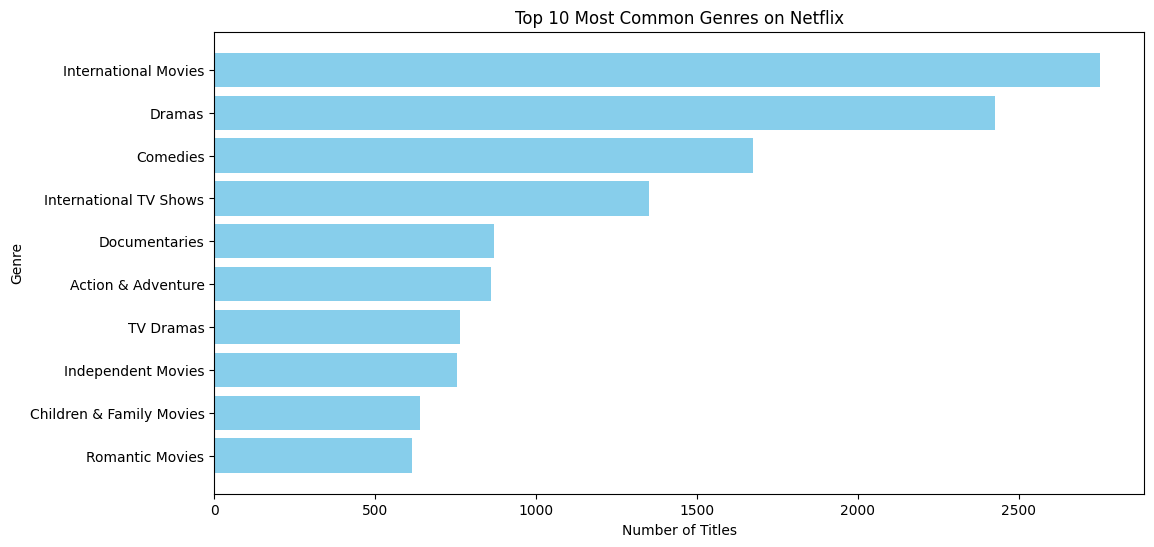

In [40]:
# Plot most common genres
plt.figure(figsize=(12, 6))
plt.barh(genre_df['Genre'].head(10), genre_df['Count'].head(10), color='skyblue')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres on Netflix")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### **Inference**
- **International Movies** significantly outnumber other genres, indicating a strong focus on international film content.
- **Dramas** are the second most prevalent genre, suggesting a large portion of the catalog falls under this category.
- **Comedies** also represent a substantial portion of the content.
- **International TV Shows** are the most frequent type of TV show among the top genres, surpassing other TV-specific categories.

## **Number of Netflix Titles released over time**

In [41]:
# Count number of releases per year
release_trend = df_clean['release_year'].value_counts().sort_index()

# Display recent trends
release_trend.tail(10)

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64

## **Inference**
- **.value_counts()** calculates the frequency of each unique year in the column, effectively counting the number of releases for each year.
- **.sort_index()** sorts the resulting Series by the index (which is the release year) in ascending order. The result is stored in the **release_trend** variable.

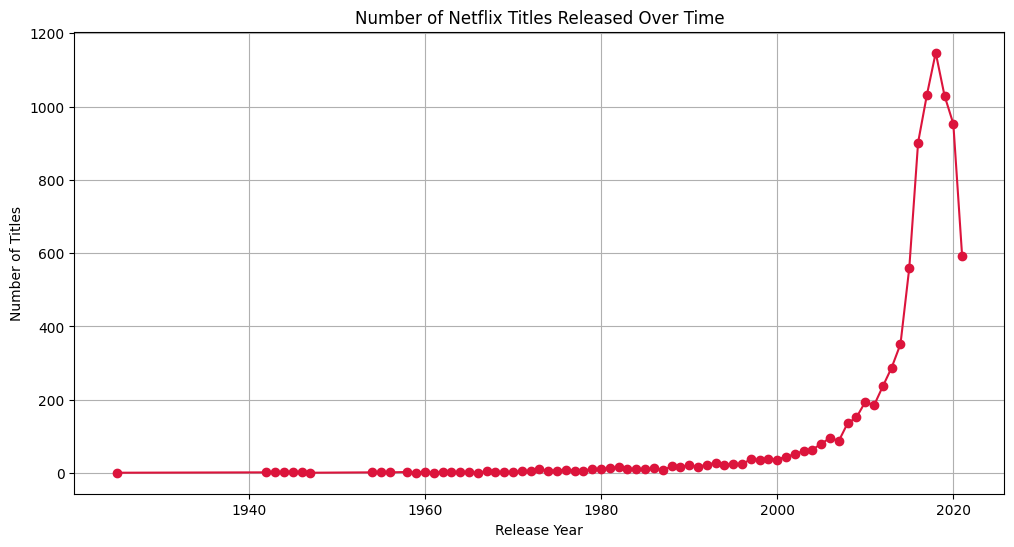

In [42]:
# Plot the trend of releases over time
plt.figure(figsize=(12, 6))
plt.plot(release_trend.index, release_trend.values, marker='o', linestyle='-', color='crimson')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Number of Netflix Titles Released Over Time")
plt.grid(True)
plt.show()

### **Inference**
- There was a noticeable **increase** in the number of releases each year from *2012 (237)* to *2018 (1147)*.
- The number of releases peaked in 2018.
- Following the peak in 2018, there was a decrease in the number of releases in 2019 (1030), 2020 (953), and a more significant drop in 2021 (592) probably due to COVID.

## **Top 10 Longest Average Duration by Genre**

In [43]:
# Explode multi-genre entries again
df_genres = df_clean.assign(listed_in=df_clean['listed_in'].str.split(','))
df_exploded = df_genres.explode('listed_in')

# Group by genre and calculate average duration
genre_duration = df_exploded.groupby('listed_in')['duration_num'].mean().sort_values(ascending=False)

# Display top 10 genres with longest duration
genre_duration.head(10)

listed_in
Classic & Cult TV        2863.636364
 Classic & Cult TV       2750.000000
TV Comedies              1512.500000
TV Sci-Fi & Fantasy      1500.000000
TV Action & Adventure    1475.000000
TV Dramas                1432.835821
Romantic TV Shows        1421.875000
TV Horror                1409.090909
 TV Sci-Fi & Fantasy     1325.301205
 Teen TV Shows           1123.188406
Name: duration_num, dtype: float64

### **Inference**
- **.value_counts()** calculates the frequency of each unique year in the column, effectively counting the number of releases for each year.
- **.sort_index()** sorts the resulting Series by the index (which is the release year) in ascending order. The result is stored in the release_trend variable.
- **release_trend.tail(10)** selects and displays the last 10 rows of the release_trend Series. Since the Series is sorted by year, this shows the release counts for the 10 most recent years present in the data.

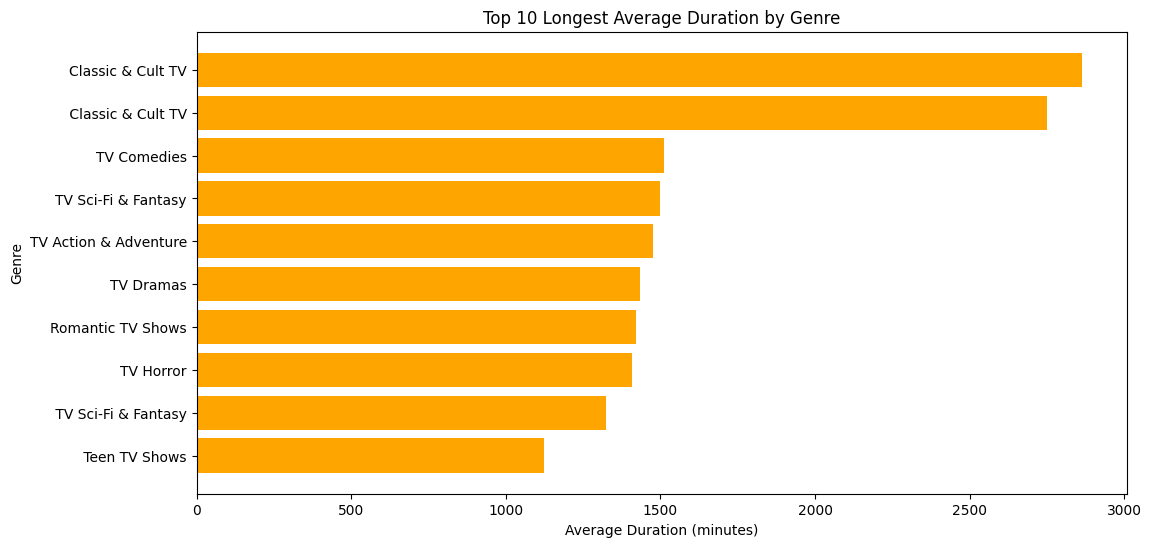

In [44]:
# Plot
plt.figure(figsize=(12, 6))
plt.barh(genre_duration.head(10).index, genre_duration.head(10).values, color='orange')
plt.xlabel("Average Duration (minutes)")
plt.ylabel("Genre")
plt.title("Top 10 Longest Average Duration by Genre")
plt.gca().invert_yaxis()
plt.show()


### **Inference**
- There was a noticeable increase in the number of releases each year from *2012 (237)* to *2018 (1147).*
- The number of releases peaked in *2018*.
- Following the peak in 2018, there was a decrease in the number of releases in 2019 (1030), 2020 (953), and a more significant drop in 2021 (592).

## **Distribution of Content by Rating Category**

In [45]:
# Count titles by rating group
rating_counts = df_clean['rating_grouped'].value_counts()

rating_counts

rating_grouped
Mature               4009
Teens                2650
Parental Guidance    1150
Kids                  641
General               261
Unknown                96
Name: count, dtype: int64

### **Inference**
- **df_clean['rating_grouped']** selects the 'rating_grouped' column, which was created in a previous step to standardize rating categories.
- **.value_counts()** calculates the number of occurrences for each unique value within the 'rating_grouped' column. The result is a Pandas Series where the index consists of the rating groups and the values are their corresponding counts.

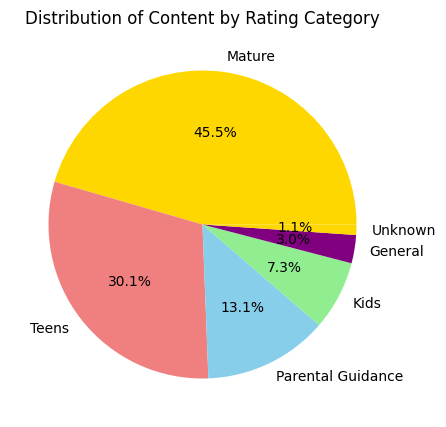

In [46]:
# Plot rating distribution
plt.figure(figsize=(8, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'skyblue', 'lightgreen', 'purple'])
plt.title("Distribution of Content by Rating Category")
plt.show()


### **Inference**
- **Mature** is the most frequent rating group, with 4009 titles. This suggests that a significant portion of the content is categorized as mature.
- **Teens** is the second largest category, containing 2650 titles.
- **General audience content** is the least represented among the explicit rating categories, with 261 titles.

## **Duration Distribution of Netflix Movies & TV Shows**

In [47]:
# Extract numeric values from duration column
df_clean['duration_int'] = df_clean['duration'].str.extract('(\d+)').astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\suhan\AppData\Local\Temp\ipykernel_109976\2099987937.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_clean['duration_int'] = df_clean['duration'].str.extract('(\d+)').astype(float)


In [48]:
import seaborn as sns

C:\Users\suhan\AppData\Local\Temp\ipykernel_109976\425734409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean['type'], y=df_clean['duration_int'], palette=["red", "blue"])


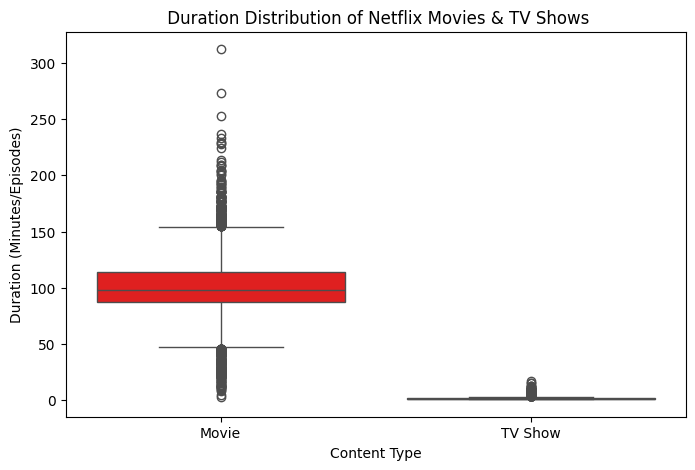

In [49]:
# Box plot for movie & TV show durations
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_clean['type'], y=df_clean['duration_int'], palette=["red", "blue"])
plt.xlabel("Content Type")
plt.ylabel("Duration (Minutes/Episodes)")
plt.title(" Duration Distribution of Netflix Movies & TV Shows")
plt.show()

### **Inference**
- **Movies have a wider range of durations:** The box plot for movies is significantly taller than that for TV shows, indicating a greater variability in movie lengths.
- **Typical movie duration is longer:** The median duration (the line inside the box) for movies is noticeably higher than the median duration for TV shows. This suggests that, on average, movies are longer than individual episodes of TV shows.
- **TV shows have shorter, more consistent "durations":** The box for TV shows is very compressed towards the lower end of the duration scale. This is expected as the "duration" for TV shows in this context likely refers to the length of individual episodes, which tend to be within a narrower range.
- **Outliers in movie durations:** The movie box plot shows several outliers extending to much longer durations (above 150 minutes, some even exceeding 300 minutes). This indicates the presence of some very long movies in the dataset.
- **Outliers in TV show "durations":** There are also some outliers for TV shows, indicating a few instances where the "duration" (likely episode length or potentially total duration represented in a similar unit) is longer than the typical episode length, though these are less extreme than the movie outliers.
- **Majority of movies fall within a specific range**: The interquartile range (the height of the box) for movies suggests that a large portion of movies have durations between approximately 90 and 120 minutes.
- **Majority of TV show "durations" are short:** The interquartile range for TV shows is very small and close to zero, reinforcing that individual episodes tend to be relatively short.

## __**Netflix Content Density by Country**__

In [50]:
# Prepare country data (Top 10 countries)
country_data = df_clean[df_clean['country'] != 'Unknown']['country'].value_counts().head(10)

# Create a heatmap-friendly DataFrame
country_df = pd.DataFrame({'Country': country_data.index, 'Count': country_data.values})
country_df = country_df.pivot_table(values='Count', index='Country', aggfunc='sum')

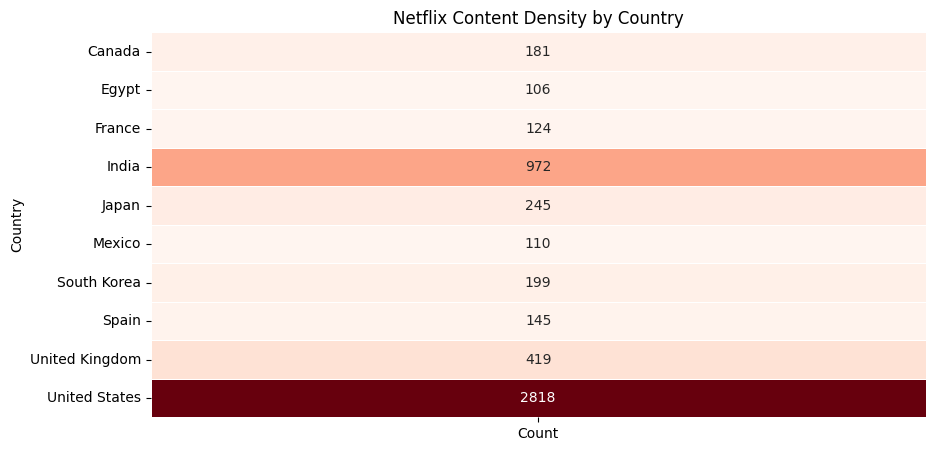

In [51]:
# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(country_df, annot=True, fmt='d', cmap="Reds", linewidths=0.5, cbar=False)
plt.title("Netflix Content Density by Country")
plt.xlabel("")
plt.ylabel("Country")
plt.show()

### **Inference**
- **United States has the highest content density:** The darkest shade of red is associated with the United States (2818), indicating the highest concentration of Netflix content.
- **India has significant content density:** India is represented by a moderately dark shade of red (972), signifying the second-highest content density among the displayed countries.
- **United Kingdom has a noticeable content density:** The United Kingdom also shows a noticeable density with a lighter shade of red (419).

## **Final Conclution**
- Netflix’s content library is dominated by TV-MA and TV-14 rated shows.
- 🌍 The USA contributes the most content, but global diversity is increasing.
- 📅 Most content was added in recent years, aligning with Netflix’s expansion.